# [OpenCV-Python Tutorial] Getting Started

In this notebook, we will see how to use OpenCV-Python and some basic operations of OpenCV.

---

# Import OpenCV-Python and other packages

In [2]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

print("OpenCV-Python Version %s" % cv2.__version__)

OpenCV-Python Version 4.5.3


# Open/display an image

In [3]:
img = cv2.imread('images/messi.jpg', cv2.IMREAD_COLOR)

# If the image path is wrong, the resulting img will be none
if img is None:
    print('Open Error')
else:
    print('Image Loaded')

Image Loaded


In [4]:
# Check the resulting img
print(type(img))
print(img.shape)
print(img.dtype)
print(img[:2, :2, :])  # Right-upper-most few pixels of the imag

<class 'numpy.ndarray'>
(342, 548, 3)
uint8
[[[39 43 44]
  [42 46 47]]

 [[37 40 44]
  [42 45 49]]]


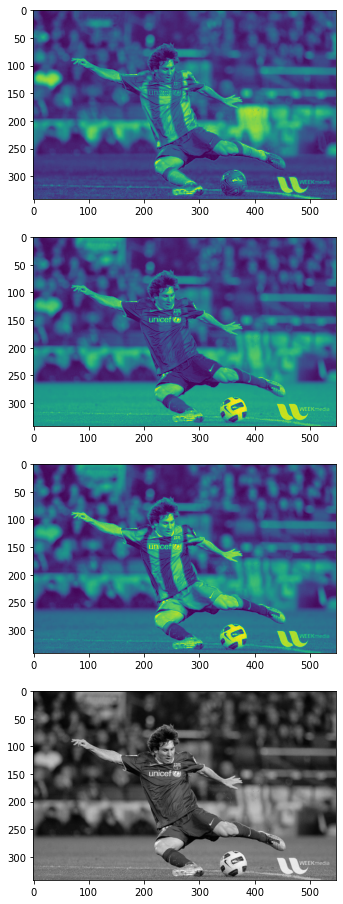

In [5]:
# display an image using matplotlib
# plt.imshow(img) # => The color of this line is wrong
# plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
fig, (ax0,ax1,ax2,ax3) = plt.subplots(4,1, figsize=(16,16))
ax0.imshow(img[:,:,0])
ax1.imshow(img[:,:,1])
ax2.imshow(img[:,:,2])
ax3.imshow(img[:,:,0]*0.114+img[:,:,1]*0.587+img[:,:,2]*0.299,cmap="gray")


# Basic operations on Images
## 1. Draw an object

- `cv2.line(image, startPoint, endPoint, rgb, thinkness)`
- `cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)`
- `cv2.circle(image, center, radius, rgb, thinkness)`
- `cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)`

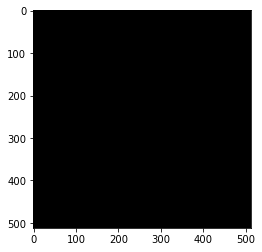

In [6]:
# Create a black image
img2 = np.zeros((512,512,3), np.uint8)
plt.imshow(img2)

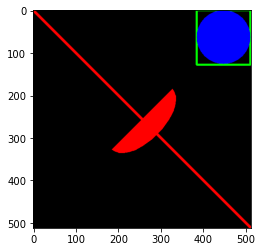

In [7]:
# Draw a line using cv2.line(image, startPoint, endPoint, rgb, thinkness)
cv2.line(img2, (0,0), (511,511), (255,0,0), 5)
# => Diagonal red line with thickness of 5 px

# Draw a rectangle using cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)
cv2.rectangle(img2, (384,0), (510,128), (0,255,0), 3)
# => Green rectangle with thickness of 3 px

# Draw a circle using cv2.circle(image, center, radius, rgb, thinkness)
cv2.circle(img2, (447,63), 63, (0,0,255), -1)
# => Blue filled circle(note that the thinkness is -1)

# Draw a ellipse using cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)
cv2.ellipse(img2, (256,256), (100,50), -45, 0, 180, (255,0,0), -1)
# => Red wide down-half ellipse

plt.imshow(img2)

In [8]:
# Draw a line using cv2.polylines(image, points, isClosed, rgb, thinkness, lineType, shift)
pts = np.array([[10,10],[150,200],[300,150],[200,50]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img2,[pts],True,(0,255,255),3)
# => Cyan closed quadrangle 

print(pts)
plt.imshow(img2)

[[[ 10  10]]

 [[150 200]]

 [[300 150]]

 [[200  50]]]


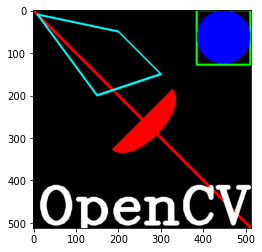

In [9]:
# Put some text using cv2.putText(image, text, bottomLeft, fontType, fontScale, rgb, thinkness, lineType)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img2, 'OpenCV', (10,500), font, 4, (255,255,255), 10, cv2.LINE_AA)
# => White 'OpenCV' text at the bottom

plt.imshow(img2)

---

## 2. Modify pixels & ROI

- You can access/modify a single pixel or ROI using Numpy indexing.
- Just like matrix indexing, `img[a, b]` refer to `a`-th row and `b`-th column.

In [10]:
# Access a pixel value(BGR order)
img[50, 235]

array([29, 24, 25], dtype=uint8)

In [43]:
# Change pixel values
for i in range(5):
    for j in range(5):
        img[50+i, 235+j] = (0, 255, 0)
# => Green dot above messi's head

fig,(ax0,ax1,ax2,ax3) = plt.subplots(4,1,figsize=(16,16))
ax0.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# plt.imshow(cv2.cvtColor(img[90:130,230:260], cv2.COLOR_BGR2RGB))
ax1.imshow(cv2.cvtColor(img[:,::-1,:], cv2.COLOR_BGR2RGB))

# 缩小
img_small = np.zeros(shape = (img.shape[0]//2,img.shape[1]//2,3),dtype="float32")
img_small[:,:,:] = img[::2,::2,:]
print(np.shape(img_small),np.shape(img))
ax2.imshow(cv2.cvtColor(img_small/255, cv2.COLOR_BGR2RGB))

#放大

img_big = np.ones(shape = (img.shape[0]*2,img.shape[1]*2,3),dtype="float32")
img_big[::2,::2,:] = img[::,::,:]
jugde = np.ones(shape = (3),dtype="float32")
# print(jugde)
# print(np.shape(img_big),np.shape(img),np.shape((img_big[0:(img_big.shape[0]-2):2,0:(img_big.shape[1]-2):2,:] + img_big[2::2,2::2,:])))
# print(img_big,"====================================/n")
# print(img_big[0:(img_big.shape[0]-2):2,0:(img_big.shape[1]-2):2,:] + img_big[2::2,2::2,:])
img_big[1:(img_big.shape[0]-2):2,1:(img_big.shape[1]-2):2,:] +=(img_big[0:(img_big.shape[0]-2):2,0:(img_big.shape[1]-2):2,:] + img_big[2::2,2::2,:])/2
# print(img_big[1][2])
for i in range(img_big.shape[0]-1):
    for j in range(img_big.shape[1]-1):
        if len(np.unique(img_big[i][j]/ jugde)) == 1:
            img_big[i][j] = (img_big[i+1][j]+img_big[i-1][j]+img_big[i][j+1]+img_big[i][j-1])/4        
# print(img_big)
# print(img_big)
ax3.imshow(cv2.cvtColor(img_big/255, cv2.COLOR_BGR2RGB))
# img2=cv2.resize(img,(img.shape[1]//4,img.shape[0]//4),interpolation=cv2.INTER_NEAREST)
# plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

(171, 274, 3) (342, 548, 3)
[1. 1. 1.]
[1. 1. 1.]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 39.     43.     44.   ]
  [ 30.875  33.75   34.875]
  [ 42.     46.     47.   ]
  ...
  [ 41.25   39.75   39.75 ]
  [ 52.     50.     50.   ]
  [  1.      1.      1.   ]]

 [[ 29.625  32.25   34.125]
  [ 41.5    45.     47.5  ]
  [ 42.625  46.125  48.75 ]
  ...
  [ 57.     55.     55.   ]
  [ 41.75   40.25   40.25 ]
  [  1.      1.      1.   ]]

 [[ 37.     40.     44.   ]
  [ 40.75   44.     47.75 ]
  [ 42.     45.     49.   ]
  ...
  [ 58.75   56.875  57.125]
  [ 57.     55.     55.   ]
  [  1.      1.      1.   ]]

 ...

 [[ 39.25  102.     70.5  ]
  [ 57.    140.     98.   ]
  [ 60.    142.     99.875]
  ...
  [ 61.    134.     96.   ]
  [ 44.25   99.     70.   ]
  [  1.      1.      1.   ]]

 [[ 45.    129.     87.   ]
  [ 40.25  102.5    71.   ]
  [ 58.    140.     98.   ]
  ...
  [ 41.25   96.     67.5  ]
  [ 51.    124.     86.   ]
  [  1.      1.      1.   ]]

 [[  1.      1.      1.   ]
  [  1.      1.      1.   ]
  [  1.      1.      1.   ]
  ...
  [  1.      1.      1. 

In [ ]:
# ROI is obtained using Numpy indexing 
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball

# img[50:55, 235:240] = (0, 255, 0)  # The for-loop in the code block above is equavalent to this line. 

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

---

### Reference

Please see the following official tutorials for more detailed explanation.

 - [Basic Operations on Images — OpenCV documentation](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_core/py_basic_ops/py_basic_ops.html)
 - [Drawing Functions in OpenCV — OpenCV documentation](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_drawing_functions/py_drawing_functions.html)